# Lab 7

## Event Selection Optimization

You and your lab partner should pick different pT (transverse momentum) samples (one uses low-pT sampels and the other use high-pT samples) for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

In [2]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson
import pickle
import pandas as pd

In [3]:
# pickle read higgs and qcd files
higgs_file = open("Higgs_data/Sample_pt_250_500/higgs_100000_pt_250_500.pkl", 'rb')
higgs_dict = pickle.load(higgs_file)
qcd_file = open("Higgs_data/Sample_pt_250_500/qcd_100000_pt_250_500.pkl", 'rb')
qcd_dict = pickle.load(qcd_file)

print(higgs_dict.keys()) # qcd_dict has same keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [4]:
# pull out the arrays
pt_h = higgs_dict['pt']
eta_h = higgs_dict['eta']
phi_h = higgs_dict['phi']
mass_h = higgs_dict['mass']
ee2_h = higgs_dict['ee2']
ee3_h = higgs_dict['ee3']
d2_h = higgs_dict['d2']
ang_h = higgs_dict['angularity']
t1_h = higgs_dict['t1']
t2_h = higgs_dict['t2']
t3_h = higgs_dict['t3']
t21_h = higgs_dict['t21']
t32_h = higgs_dict['t32']
KtDeltaR_h = higgs_dict['KtDeltaR']

pt_q = qcd_dict['pt']
eta_q = qcd_dict['eta']
phi_q = qcd_dict['phi']
mass_q = qcd_dict['mass']
ee2_q = qcd_dict['ee2']
ee3_q = qcd_dict['ee3']
d2_q = qcd_dict['d2']
ang_q = qcd_dict['angularity']
t1_q = qcd_dict['t1']
t2_q = qcd_dict['t2']
t3_q = qcd_dict['t3']
t21_q = qcd_dict['t21']
t32_q = qcd_dict['t32']
KtDeltaR_q = qcd_dict['KtDeltaR']

## Problem 1

Make a stacked histogram plot for the feature variable: mass.

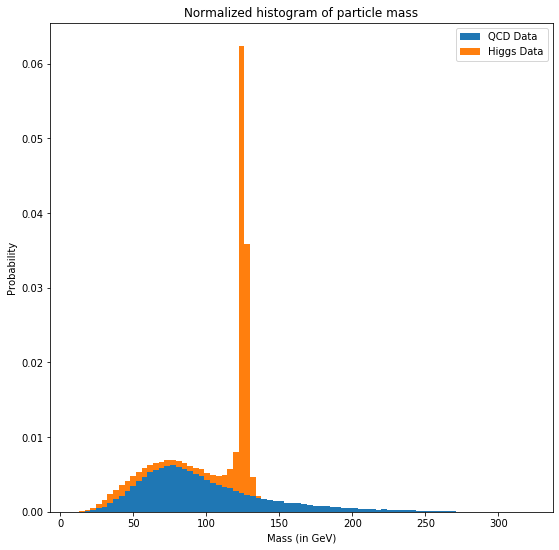

In [5]:
# Ok, we need to make this normalized, and want to stack h mass and q mass
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([mass_q, mass_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of particle mass")
ax.set_ylabel("Probability")
ax.set_xlabel("Mass (in GeV)")
ax.legend(["QCD Data", "Higgs Data"]);

Evaluate expected significance without any event selection.

In [6]:
# given N_qcd and N_higgs
N_qcd = 20000
N_higgs = 100

# Poisson statistics significance calculation
poisson_significance = poisson.cdf(N_qcd + N_higgs, N_qcd)
print("Poisson: " + str(poisson_significance))

analytic_significance = N_higgs / np.sqrt(N_qcd)
print("Analytic: " + str(analytic_significance))

Poisson: 0.7615278780931256
Analytic: 0.7071067811865475


The analytic significance is smaller than the poisson significance. This makes sense because adding the means like this doesn't make any sense.

## Problem 2

Identify mass cuts to optimize the expected sigificance. Try different mass cuts systematically.

The optimal mass cuts will occur around the higgs value spike, so we want to find count values for that. Lets slice up masses into 5 chunks.

Evaluate expected significance for each set of mass cuts. Identify the set of the mass cuts which give you the highest significance.

In [7]:
# tweakables
cuts = 5      # breaks on cuts = 1 for some reason
start = 100
end = 150

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(mass_h)
t_qcd = len(mass_q)

# outputs
all_significances = np.zeros(cuts)
best_significance = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    cut_h = np.where(np.logical_and(mass_h >= lower, mass_h <= upper))[0]
    cut_q = np.where(np.logical_and(mass_q >= lower, mass_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * N_qcd
    
    cut_significance = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    #record current significance
    all_significances[idx] = cut_significance
    
    if cut_significance > best_significance:
        best_significance = cut_significance
        best_lower = lower
        best_upper = upper
    
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))
print("All significances: " + str(all_significances))

Best significance: 0.992060582564444
Best cut: 120.0 - 130.0
All significances: [0.52503567 0.55009559 0.99206058 0.54091126 0.50106557]


## Problem 3

Make stacked histogram plots for the rest of features.

Set A of plots without any selection. Can you identify another feature as discriminative as mass?

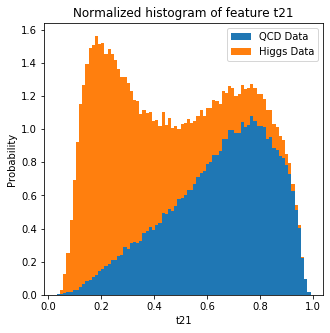

In [16]:
# since doing all features is a bit much, I shall choose a couple others.
# The features I shall investigate are t21, pT, and something that should be
# poor, like phi

figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t21_q, t21_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of feature t21")
ax.set_ylabel("Probability")
ax.set_xlabel("t21")
ax.legend(["QCD Data", "Higgs Data"]);

Set B of plots with your optimal mass cuts. Can you identify additional features to further improve expected significance?

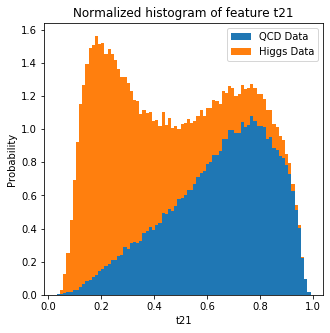

In [8]:
# t21
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t21_q, t21_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of feature t21")
ax.set_ylabel("Probability")
ax.set_xlabel("t21")
ax.legend(["QCD Data", "Higgs Data"]);

In [9]:
# Thats... not normalized, but ok


#Copy and pasted from above, changed to be more generic

# tweakables
feature_h = t21_h
feature_q = t21_q
cuts = 10    # breaks on cuts = 1 for some reason
start = 0.0
end = 1.0

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(feature_h)
t_qcd = len(feature_q)

# outputs
best_significance = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * N_qcd
    
    cut_significance = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_significance > best_significance:
        best_significance = cut_significance
        best_lower = lower
        best_upper = upper
    
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 0.9170211917385215
Best cut: 0.1 - 0.2


This is what I would expect given the above histogram.

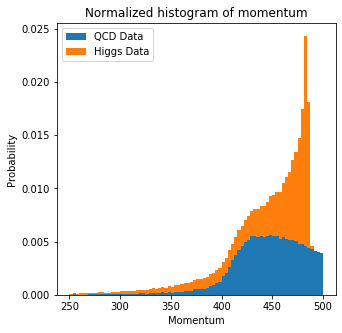

In [13]:
# On to pT
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([pt_q, pt_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of momentum")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
ax.legend(["QCD Data", "Higgs Data"]);

In [11]:
#Copy and pasted from above

# tweakables
feature_h = pt_h
feature_q = pt_q
cuts = 50    # breaks on cuts = 1 for some reason
start = 250.0
end = 500.0

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(feature_h)
t_qcd = len(feature_q)

# outputs
best_significance = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * N_qcd
    
    cut_significance = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_significance > best_significance:
        best_significance = cut_significance
        best_lower = lower
        best_upper = upper
    
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 0.7437220617721526
Best cut: 480.0 - 485.0


This again feels reasonable given the histogram data.

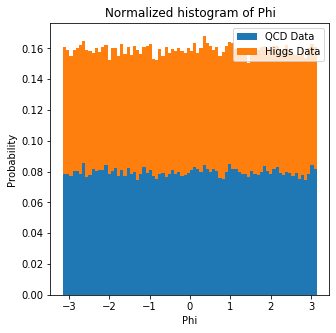

In [12]:
# Now on to something I think would probably be worse. Phi

figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([phi_q, phi_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of Phi")
ax.set_ylabel("Probability")
ax.set_xlabel("Phi")
ax.legend(["QCD Data", "Higgs Data"]);

In [15]:
#Copy and pasted from above

# tweakables
feature_h = phi_h
feature_q = phi_q
cuts = 50    # breaks on cuts = 1 for some reason
start = -3
end = 3

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(feature_h)
t_qcd = len(feature_q)

# outputs
best_significance = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * N_qcd
    
    cut_significance = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_significance > best_significance:
        best_significance = cut_significance
        best_lower = lower
        best_upper = upper
    
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 0.55304713336652
Best cut: 0.3599999999999999 - 0.47999999999999987


55% confidence is pretty terrible, but given this histogram I was not expecting useful cuts anyways.

## Problem 4
Optimize event selections using multiple features (if necessary)

Find a set of feature cuts which can help you to achieve the best significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

# Lab 8

## Pseudo-experiment data analysis

Using your optimized event selection, hunt for your signal by using one of the pseudo-experiment dataset. For each task below, you will choose one of the observed data from your specific pT sample to perform the analysis.

In [19]:
hi_lumi_file = "Higgs_data/Sample_pt_250_500/data_highLumi_pt_250_500.h5"
hi_data = pd.read_hdf(hi_lumi_file)

lo_lumi_file = "Higgs_data/Sample_pt_250_500/data_lowLumi_pt_250_500.h5"
lo_data = pd.read_hdf(lo_lumi_file)

## High luminosity data

Focus on each feature of your event selection. Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.

Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.

Evaluate observed significance and compare your results to expectation.

## Low luminosity data

Focus on each feature of your event selection. Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.

Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.

Evaluate observed significance and compare your results to expectation.

## 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 sigma, We will calculate the 95% confidence level upper limit of signal yield.

Evaluate the expected 95% confidence level upper limit

Evaluate the observed 95% confidence level upper limit

Compare expectation to observation. Comment on your finding.